In [ ]:
import os
os.environ['KAGGLE_USERNAME']="sonalsingh99314"
os.environ['KAGGLE_KEY']="877d1a361a530435bdc152876b122fe1"
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection


 40% 6.00M/15.1M [00:00<00:00, 62.7MB/s]
100% 15.1M/15.1M [00:00<00:00, 73.9MB/s]


In [2]:
from zipfile import ZipFile
file_name="/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [26]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from  PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [27]:
encoder=OneHotEncoder()
encoder.fit([[0],[1]])    # 0:tumour  # 1: normal

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [28]:
#this cell updates result list for images with tumour

data=[]    # to stores the images in numpy form
paths=[]    #path of every images
result=[]   #to store  result in 0 and 1 form

for r,d,f in os.walk(r'/content/yes'):
  for file in f:
    if '.jpg' in file:
        paths.append(os.path.join(r,file))   #storing the path of every images of yes folder 

for path in paths:   
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)    
  if (img.shape==(128,128,3)):
    data.append(np.array(img))    # in data , numpy form of images is stored 
    result.append(encoder.transform([[0]]).toarray())   #

In [29]:
#this cell updates result list for images without tumour

paths=[]    #path of every images


for r,d,f in os.walk(r'/content/no'):
  for file in f:
    if '.jpg' in file:
        paths.append(os.path.join(r,file))   #storing the path of every images of no folder 

for path in paths:   
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)    
  if (img.shape==(128,128,3)):
    data.append(np.array(img))    # in data , numpy form of images is stored 
    result.append(encoder.transform([[1]]).toarray())  

In [30]:
data=np.array(data)   
data.shape

(139, 128, 128, 3)

In [31]:
result=np.array(result)
result=result.reshape(139,2)

In [32]:
##splitting the data in train and test
x_train,x_test,y_train,y_test=train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

In [33]:
##model build
model=Sequential()
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adamax')
print(model.summary())



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)       

In [34]:
y_train.shape

(111, 2)

In [35]:
history=model.fit(x_train,y_train,epochs=30,batch_size=40,verbose=1,validation_data=(x_test,y_test))

Epoch 1/30
3/3 [==============================] - 2s 277ms/step - loss: 17.6809 - val_loss: 31.0418
Epoch 2/30
3/3 [==============================] - 0s 140ms/step - loss: 5.2953 - val_loss: 48.9114
Epoch 3/30
3/3 [==============================] - 0s 137ms/step - loss: 10.4208 - val_loss: 17.8775
Epoch 4/30
3/3 [==============================] - 0s 137ms/step - loss: 4.2056 - val_loss: 12.6449
Epoch 5/30
3/3 [==============================] - 0s 138ms/step - loss: 1.6542 - val_loss: 15.1161
Epoch 6/30
3/3 [==============================] - 0s 138ms/step - loss: 0.5388 - val_loss: 13.1434
Epoch 7/30
3/3 [==============================] - 0s 138ms/step - loss: 1.0852 - val_loss: 14.3417
Epoch 8/30
3/3 [==============================] - 0s 140ms/step - loss: 0.8916 - val_loss: 16.8091
Epoch 9/30
3/3 [==============================] - 0s 139ms/step - loss: 0.6011 - val_loss: 13.9090
Epoch 10/30
3/3 [==============================] - 0s 135ms/step - loss: 0.0802 - val_loss: 10.0395
Epoch 1

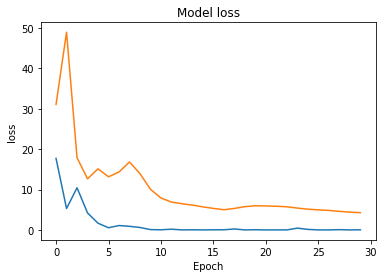

In [36]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
"""
from matplotlib.pyplot import imshow
img=Image.open(r,'/content/y10')
x
